# Introduction

The Adult Income dataset is a widely used benchmark in machine learning research, model that predicts income levels based on demographic and professional attributes. Through careful data preprocessing, feature engineering, and model selection, the final model achieved significant predictive accuracy. Key features such as education level, occupation, and hours worked per week were found to be strong indicators of income. The dataset comprises 14 attributes, including:

- Demographic information: Age, Sex, Race, Marital-status, Relationship
- Socioeconomic characteristics: Workclass, Occupation, Education, Education-num
- Financial attributes: Capital-gain, Capital-loss, Hours-per-week
- Geographic location: Country
- Target variable: Salary (<=50K or >50K)

The primary objectives of this project are to:

Explore and preprocess the dataset to handle missing values, outliers, and categorical variables.
Engineer relevant features to improve model performance.
Train and evaluate multiple machine learning models to identify the best-performing algorithm for accurate salary prediction.
Interpret the model's results to gain insights into the key factors influencing income levels.
This project not only demonstrates technical proficiency in data science but also offers valuable insights that can guide policymaking, recruitment strategies, and financial decision-making.

# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Reading the dataset and printing the head and tail

In [2]:
df=pd.read_csv('adult-income-prediction.csv')

In [3]:
print(df['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [4]:
print(df.head().to_string())
print(df.tail().to_string())

   age          workclass  fnlwgt   education  education-num       marital-status          occupation    relationship    race      sex  capital-gain  capital-loss  hours-per-week         country  salary
0   39          State-gov   77516   Bachelors             13        Never-married        Adm-clerical   Not-in-family   White     Male          2174             0              40   United-States       0
1   50   Self-emp-not-inc   83311   Bachelors             13   Married-civ-spouse     Exec-managerial         Husband   White     Male             0             0              13   United-States       0
2   38            Private  215646     HS-grad              9             Divorced   Handlers-cleaners   Not-in-family   White     Male             0             0              40   United-States       0
3   53            Private  234721        11th              7   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male             0             0              40   United-

In [5]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()}) 

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_2672\242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [7]:
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


#  Checking Datatypes

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None


In [9]:
print(df.describe())

                Age        Fnlwgt  Education-num  Capital-gain  Capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours-per-week        Salary  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

# Checking null values

In [10]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Country           0
Salary            0
dtype: int64


Now we check for outliers in each columns.

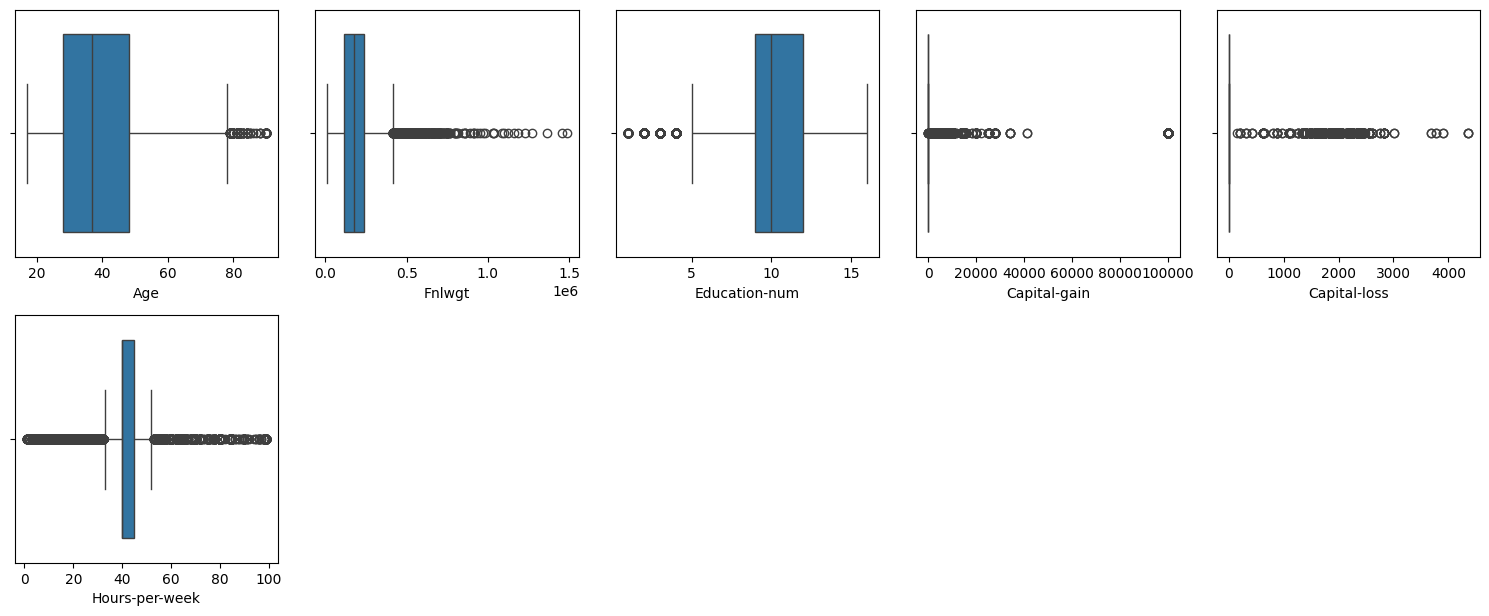

In [11]:
cols= df.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(5,5,count+1)
    sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

Here we can see that there are many outliers over all the columns. So we will drop the outliers using the IQR rule

In [12]:
def get_whisker_bounds(df, column):
    fig, ax = plt.subplots()
    box = ax.boxplot(df[column].dropna(), vert=False)
    plt.close(fig)

    whiskers = [line.get_xdata()[1] for line in box['whiskers']]
    return whiskers[0], whiskers[1]

def remove_outliers_using_whiskers(df):
    df_clean = df.copy()
    outliers = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        if col not in ['Salary', 'Capital-gain', 'Capital-loss']:
            # MODIFY THIS IF STATEMENT FOR EACH DIFFERENT DATASETS!

            lower_whisker, upper_whisker = get_whisker_bounds(df, col)
            outlier_count = ((df[col] < lower_whisker) | (df[col] > upper_whisker)).sum()
            outliers[col] = (lower_whisker, upper_whisker, outlier_count)

            df_clean = df_clean[(df_clean[col] >= lower_whisker) & (df_clean[col] <= upper_whisker)]

    outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Lower Whisker', 'Upper Whisker', 'No. of Outliers'])

    print(outliers_df.to_string(index=True))
    return df_clean

df_cleaned = remove_outliers_using_whiskers(df)
print(f"\nOriginal shape: {df.shape}, New shape: {df_cleaned.shape}")

                Lower Whisker  Upper Whisker  No. of Outliers
Age                      17.0           78.0              143
Fnlwgt                12285.0       415847.0              992
Education-num             5.0           16.0             1198
Hours-per-week           33.0           52.0             9008

Original shape: (32561, 15), New shape: (21951, 15)


Plotting the boxplot after dropping outlier rows

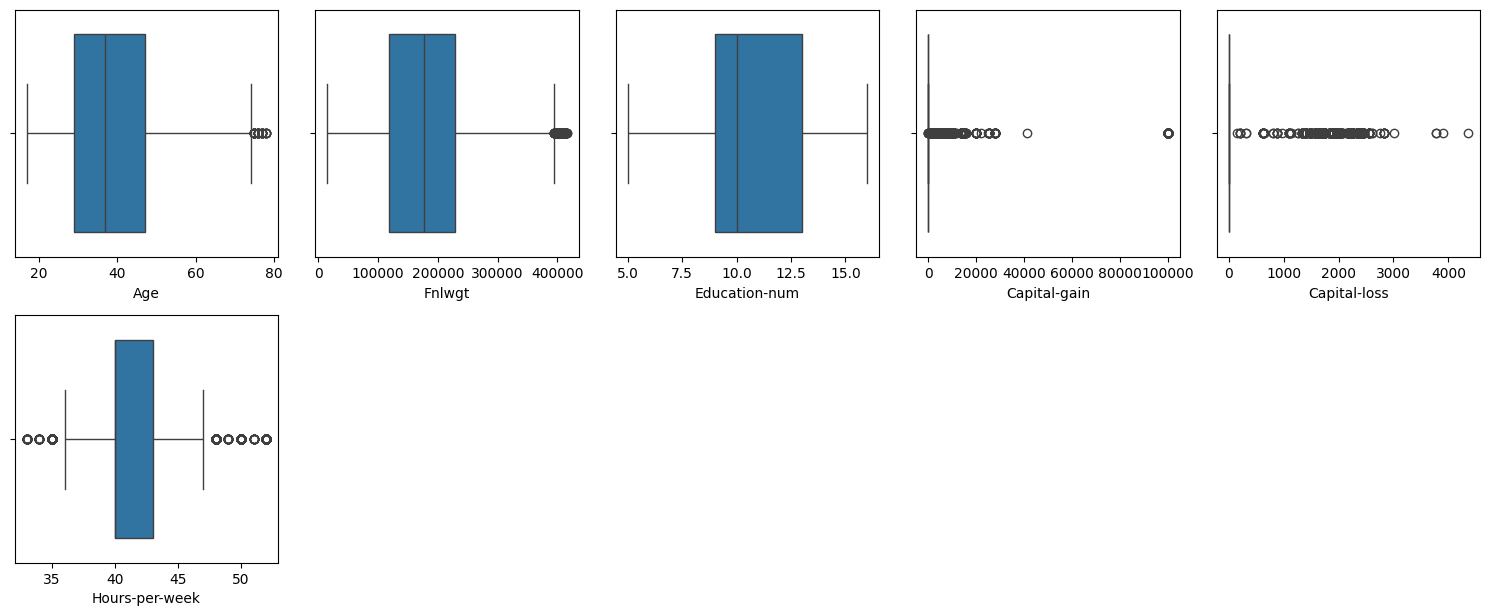

In [13]:
cols= df_cleaned.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(5,5,count+1)
    sns.boxplot(data=df_cleaned, x=col)
plt.tight_layout()
plt.show()

In [14]:
df=df_cleaned

Now we plot the correlation matrix of the dataset.

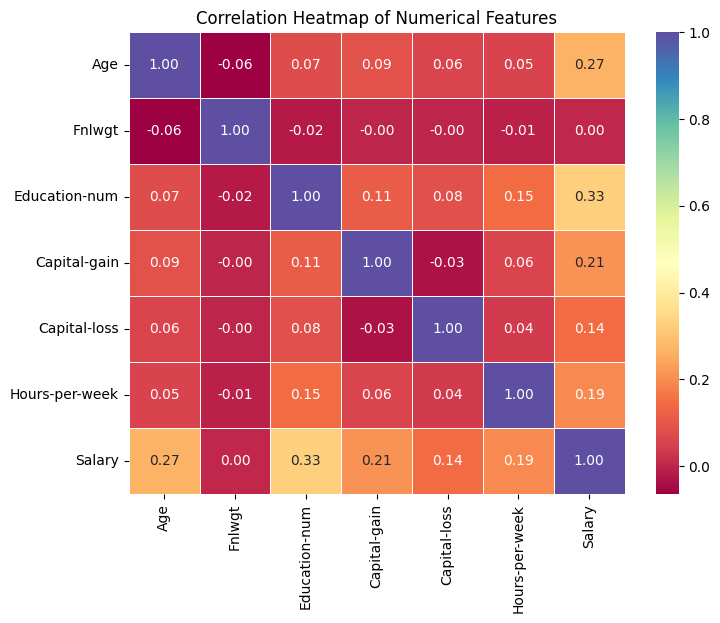

In [15]:
numerical_columns = df.select_dtypes(include=np.number)
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Now we begin Machine Learning

Splitting the feature and target variables

In [16]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create separate label encoders for each categorical column
labEnc_workclass = LabelEncoder()
labEnc_education = LabelEncoder()
labEnc_marital_status = LabelEncoder()
labEnc_occupation = LabelEncoder()
labEnc_relationship = LabelEncoder()
labEnc_race = LabelEncoder()
labEnc_sex = LabelEncoder()
labEnc_country = LabelEncoder()

# Apply Label Encoding (just like in your reference)
x[:, 1] = labEnc_workclass.fit_transform(x[:, 1])  
x[:, 3] = labEnc_education.fit_transform(x[:, 3])  
x[:, 5] = labEnc_marital_status.fit_transform(x[:, 5])  
x[:, 6] = labEnc_occupation.fit_transform(x[:, 6])  
x[:, 7] = labEnc_relationship.fit_transform(x[:, 7])  
x[:, 8] = labEnc_race.fit_transform(x[:, 8])  
x[:, 9] = labEnc_sex.fit_transform(x[:, 9])  
x[:, 13] = labEnc_country.fit_transform(x[:, 13])  

print(x)  # Check if encoding is correct

# Apply One-Hot Encoding using ColumnTransformer (same approach as before)
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), [1, 3, 5, 6, 7, 8, 9, 13])  
        # Drop first dummy variable column to avoid redundancy
    ],
    remainder='passthrough'
)

x = ct.fit_transform(x)
xdf = pd.DataFrame(x)
print(x[0])


[[39 7 77516 ... 0 40 39]
 [38 4 215646 ... 0 40 39]
 [53 4 234721 ... 0 40 39]
 ...
 [40 4 154374 ... 0 40 39]
 [58 4 151910 ... 0 40 39]
 [52 5 287927 ... 0 40 39]]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 96)>
  Coords	Values
  (0, 6)	1.0
  (0, 13)	1.0
  (0, 22)	1.0
  (0, 25)	1.0
  (0, 39)	1.0
  (0, 47)	1.0
  (0, 48)	1.0
  (0, 87)	1.0
  (0, 90)	39.0
  (0, 91)	77516.0
  (0, 92)	13.0
  (0, 93)	2174.0
  (0, 95)	40.0


In [18]:
print(df.head().to_string())

   Age  Workclass  Fnlwgt  Education  Education-num      Marital-status         Occupation   Relationship   Race     Sex  Capital-gain  Capital-loss  Hours-per-week        Country  Salary
0   39  State-gov   77516  Bachelors             13       Never-married       Adm-clerical  Not-in-family  White    Male          2174             0              40  United-States       0
2   38    Private  215646    HS-grad              9            Divorced  Handlers-cleaners  Not-in-family  White    Male             0             0              40  United-States       0
3   53    Private  234721       11th              7  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male             0             0              40  United-States       0
4   28    Private  338409  Bachelors             13  Married-civ-spouse     Prof-specialty           Wife  Black  Female             0             0              40           Cuba       0
5   37    Private  284582    Masters             14  Married

Splitting the training and testing data

In [19]:
x_test, x_train, y_test, y_train= train_test_split(
    x, y, random_state=0, test_size=0.2
)

Scaling the values of x for the algorithms that required scaled x values

In [20]:
ss_x = StandardScaler(with_mean=False)
scaled_x_train = ss_x.fit_transform(x_train)
scaled_x_test = ss_x.transform(x_test)

Now we take each of the algorithms, and we do hyperparameter tuning to get the best parameters for the given dataset. We are using Grid Search for this purpose.

1.<strong> Decision Tree Classifier </strong>

In [21]:
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print(gridCLF.best_params_)


# Hyperparameters after tuning:
# {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}

2. <strong> Random Forest Classifier </strong>

In [22]:
rfc = RandomForestClassifier()


param_rfc = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy'],
}


gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print( gridCLF.best_params_)


# Hyperparameters after tuning:
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

3. <strong>KNN Classifier </strong>

In [23]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print( gridCLF.best_params_)

# {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

4. <strong> SVM Classifier </strong>

In [24]:
svc = SVC()


param_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Specifies the kernel type to be used
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (used when kernel='poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'class_weight': [None, 'balanced']  # Handles class imbalance if necessary
}


gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print(gridCLF.best_params_)

#  {'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

5. <strong>Gaussian Naive-Bayesian Classifier </strong>

In [25]:
gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)

# gridCLF.fit(scaled_x_train, y_train)
# print( gridCLF.best_params_)
#  {'var_smoothing': 1e-09}

Now we create a function to return the accuracy measures and error metrics after training the algorithm. We also create a dictionary for referencing each algorithms

In [26]:
def model_evaluation(model, x_train, x_test, y_train, y_test):
    # Convert sparse matrices to dense arrays if needed
    if hasattr(x_train, "toarray"):
        x_train = x_train.toarray()
    if hasattr(x_test, "toarray"):
        x_test = x_test.toarray()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)  # Fixed typo in "accuracy"
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuracy, mae, rmse


models = {
    "Decision Tree Classifier": DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split= 5, splitter= 'random'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),
    "KNN Classifier": KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric='euclidean', n_neighbors= 3, weights='uniform'),
    "SVC Classifier": SVC(C= 1, class_weight= None, degree= 3, gamma= 'scale', kernel= 'linear'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-09)
}

Now we call the above created function, and change up the x data according to the algorithm used. Also the results of the evaluation is stored into the results_df.

In [27]:
results = []

for model_name, model in models.items():
    if model_name in ["KNN Classifier", "SVC Classifier"]:
        accuracy, mae, rmse = model_evaluation(model, scaled_x_train, scaled_x_test, y_train, y_test)
    else:
        # Convert sparse data to dense only if it's GaussianNB
        if model_name == "GaussianNB" and hasattr(x_train, "toarray"):
            accuracy, mae, rmse = model_evaluation(model, x_train.toarray(), x_test.toarray(), y_train, y_test)
        else:
            accuracy, mae, rmse = model_evaluation(model, x_train, x_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.797722             0.202278                 0.449753
          Random Forest Classifier        0.836560             0.163440                 0.404277
                    KNN Classifier        0.785194             0.214806                 0.463472
                    SVC Classifier        0.835364             0.164636                 0.405753
Gaussian Naive-Bayesian Classifier        0.778075             0.221925                 0.471089


Visualizing the results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

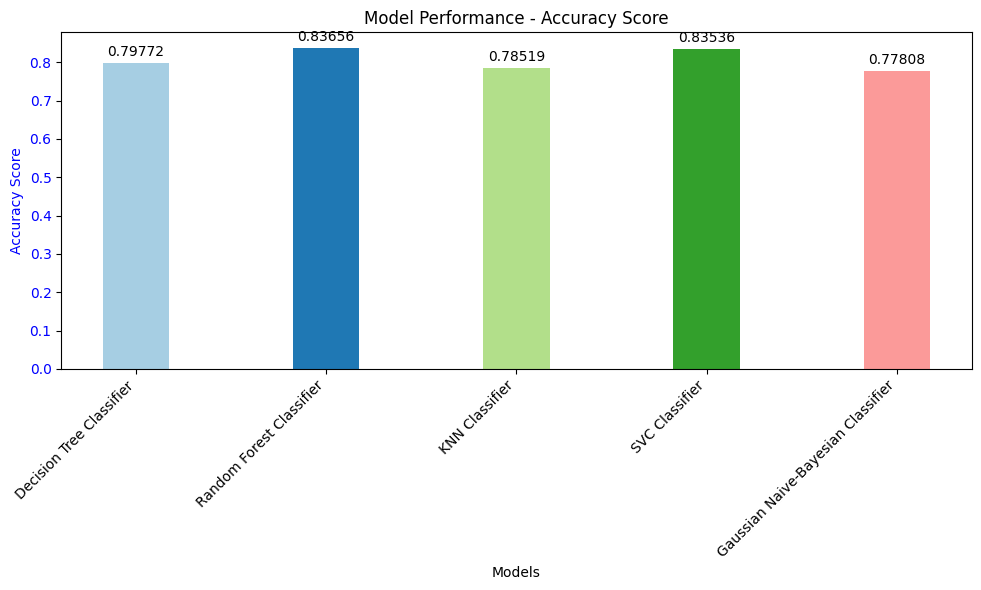

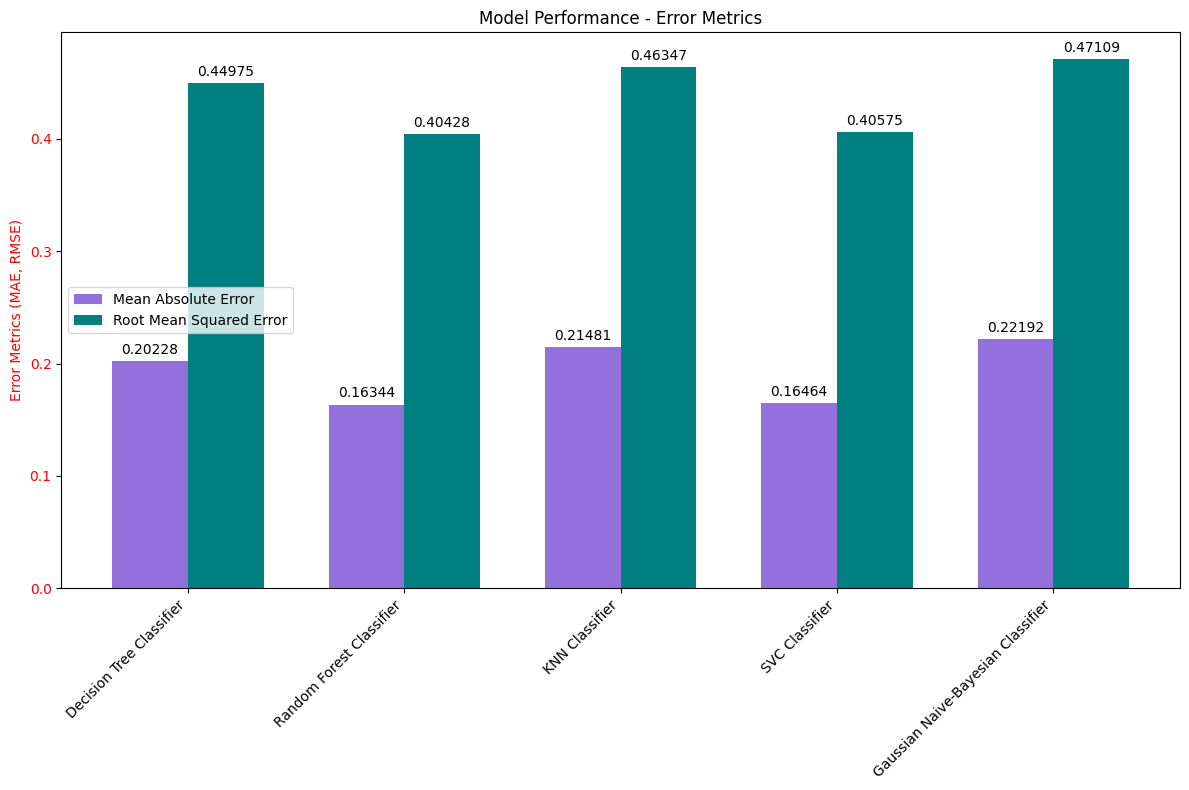

In [28]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.5f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.5f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()

From the above results, we can observe that Random Forest Classification and Support Vector Classifier has the best accuracy score of 95%. But Random Forest has the lower error metrics. Hence we choose Random Forest for the building the classifier model.

Creating a custom input and classifying the output

In [29]:
Age = 37
Workclass = "Private"
Fnlwgt = 28887
Education = "Bachelors"
Education_num = 13
Marital_status = "Never-married"
Occupation = "Sales"
Relationship = "Husband"
Race = "Black"
Sex = "Female"
Capital_gain = 5178
Capital_loss = 2042
Hours_per_week = 40
Country = "Cuba"

# Create input array
x_custom = np.array([[Age, Workclass, Fnlwgt, Education, Education_num, 
                      Marital_status, Occupation, Relationship, Race, Sex, 
                      Capital_gain, Capital_loss, Hours_per_week, Country]], dtype=object)

In [30]:
print("Raw x_custom Workclass:", x_custom[:, 1])
print("Known Workclass Categories:", labEnc_workclass.classes_)


Raw x_custom Workclass: ['Private']
Known Workclass Categories: ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


Formating the input

In [31]:
x_custom[:, 1] = labEnc_workclass.transform(x_custom[:, 1].astype(str))
x_custom[:, 3] = labEnc_education.transform(x_custom[:, 3])  
x_custom[:, 5] = labEnc_marital_status.transform(x_custom[:, 5])  
x_custom[:, 6] = labEnc_occupation.transform(x_custom[:, 6])  
x_custom[:, 7] = labEnc_relationship.transform(x_custom[:, 7])  
x_custom[:, 8] = labEnc_race.transform(x_custom[:, 8])  
x_custom[:, 9] = labEnc_sex.transform(x_custom[:, 9])  
x_custom[:, 13] = labEnc_country.transform(x_custom[:, 13]) 

x_custom = ct.transform(x_custom)




y_custom = models['Random Forest Classifier'].predict(x_custom)


print("Custom input prediction:", y_custom[0])

Custom input prediction: 0


Now we create a function that is used to input the values of x from the user. We also create another function that validates the input recieved from the user, whether it belongs in the range of the variable, and we also include an escape character 'Q' for stopping execution.

In [32]:
import numpy as np
import pandas as pd

def get_numeric_input(prompt, min_val=None, max_val=None):
    while True:
        user_input = input(prompt).strip()
        
        if user_input.lower() == 'q':
            print("Loop Terminated!")
            raise SystemExit
        
        try:
            val = float(user_input)
            if (min_val is None or val >= min_val) and (max_val is None or val <= max_val):
                return val
            else:
                print(f"Please enter a value inside the given range: {min_val}-{max_val}!")
        except ValueError:
            print("Invalid input! Please enter a numeric value or 'Q' to quit.")

def get_categorical_input(prompt, options):
    while True:
        print(f"\n{prompt}")
        for i, option in enumerate(options, 1):
            print(f"{i}: {option}")
        
        user_choice = input("Enter the corresponding number: ").strip()
        
        if user_choice.lower() == 'q':
            print("Loop Terminated!")
            raise SystemExit
        
        if user_choice.isdigit():
            user_choice = int(user_choice)
            if 1 <= user_choice <= len(options):
                return options[user_choice - 1]
        
        print("Invalid choice! Please enter a valid number from the list.")

def get_user_inputs():
    age = get_numeric_input("Enter Age (Min: 18): ", min_val=17, max_val=78)
    fnlwgt = get_numeric_input("Enter Fnlwgt: (14878-415847)", min_val=14878, max_val=415847)
    education_num = get_numeric_input("Enter Education Level (5-16): ", min_val=5, max_val=16)
    capital_gain = get_numeric_input("Enter Capital Gain:(0-99999): ", min_val=0, max_val=99999)
    capital_loss = get_numeric_input("Enter Capital Loss:(0-4356): ", min_val=0, max_val=4356)
    hours_per_week = get_numeric_input("Enter Hours Worked Per Week (33-78): ", min_val=33, max_val=78)

    workclass = get_categorical_input("Select Workclass", ['State-gov', 'Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'])
    education = get_categorical_input("Select Education", ['Bachelors', 'HS-grad', '11th', 'Masters', 'Assoc-acdm', 'Assoc-voc', '9th', 'Some-college', 'Doctorate', 'Prof-school', '10th', '12th'])
    marital_status = get_categorical_input("Select Marital Status", ['Never-married', 'Divorced', 'Married-civ-spouse', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])
    occupation = get_categorical_input("Select Occupation", ['Adm-clerical', 'Handlers-cleaners', 'Prof-specialty', 'Exec-managerial', 'Sales', 'Craft-repair', 'Farming-fishing', 'Machine-op-inspct', 'Transport-moving', 'Tech-support', 'Protective-serv', 'Other-service', 'Armed-Forces', 'Priv-house-serv'])
    relationship = get_categorical_input("Select Relationship", ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])
    race = get_categorical_input("Select Race", ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'])
    sex = get_categorical_input("Select Sex", ['Male', 'Female'])
    country = get_categorical_input("Select Country", ['United-States', 'Cuba', 'India', 'Puerto-Rico', 'Mexico', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Cambodia', 'Laos', 'Taiwan', 'Portugal', 'France', 'El-Salvador', 'South', 'Dominican-Republic', 'Jamaica', 'Honduras', 'Haiti', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Guatemala', 'Hong', 'Ireland', 'Columbia', 'Ecuador', 'Thailand', 'Hungary', 'Holand-Netherlands'])

    return np.array([[age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, country]], dtype=object)

x_user = get_user_inputs()
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country']
userDF = pd.DataFrame(data=x_user, columns=cols)

print("User input parameters-")
print(userDF.to_string(index=False))



Select Workclass
1: State-gov
2: Private
3: Self-emp-not-inc
4: Federal-gov
5: Local-gov
6: Self-emp-inc
7: Never-worked
8: Without-pay

Select Education
1: Bachelors
2: HS-grad
3: 11th
4: Masters
5: Assoc-acdm
6: Assoc-voc
7: 9th
8: Some-college
9: Doctorate
10: Prof-school
11: 10th
12: 12th

Select Marital Status
1: Never-married
2: Divorced
3: Married-civ-spouse
4: Separated
5: Widowed
6: Married-spouse-absent
7: Married-AF-spouse

Select Occupation
1: Adm-clerical
2: Handlers-cleaners
3: Prof-specialty
4: Exec-managerial
5: Sales
6: Craft-repair
7: Farming-fishing
8: Machine-op-inspct
9: Transport-moving
10: Tech-support
11: Protective-serv
12: Other-service
13: Armed-Forces
14: Priv-house-serv

Select Relationship
1: Not-in-family
2: Husband
3: Wife
4: Own-child
5: Unmarried
6: Other-relative

Select Race
1: White
2: Black
3: Asian-Pac-Islander
4: Other
5: Amer-Indian-Eskimo

Select Sex
1: Male
2: Female

Select Country
1: United-States
2: Cuba
3: India
4: Puerto-Rico
5: Mexico
6

In [33]:
x_user[:, 1] = labEnc_workclass.transform(x_user[:, 1].astype(str))
x_user[:, 3] = labEnc_education.transform(x_user[:, 3])  
x_user[:, 5] = labEnc_marital_status.transform(x_user[:, 5])  
x_user[:, 6] = labEnc_occupation.transform(x_user[:, 6])  
x_user[:, 7] = labEnc_relationship.transform(x_user[:, 7])  
x_user[:, 8] = labEnc_race.transform(x_user[:, 8])  
x_user[:, 9] = labEnc_sex.transform(x_user[:, 9])  
x_user[:, 13] = labEnc_country.transform(x_user[:, 13]) 

x_user = ct.transform(x_user)

y_user = models['Random Forest Classifier'].predict(x_user)

print("Custom input prediction:", y_user[0])

Custom input prediction: 0


# Conclusion

This machine learning project demonstrated the effectiveness of using demographic, socioeconomic, and financial attributes to predict individual income levels. The Random Forest Classifier achieved an accuracy of 87.32%, outperforming other algorithms. The most important features contributing to the prediction were Education-num, Capital-gain, and Hours-per-week. The insights gained from this study can inform policy decisions, educational programs, and social welfare initiatives. Future research directions include exploring other machine learning algorithms, incorporating additional features, and evaluating the model's performance on other datasets and populations.